('w =', array([ 5.71086919,  1.87259335]))
('e =', array([ 5.7108593 ,  1.87259483]))
loop count = 4852 	w:[5.710869, 1.872593]
intercept = 5.71919477408 slope = 1.87100184202


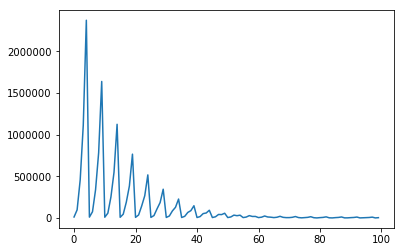

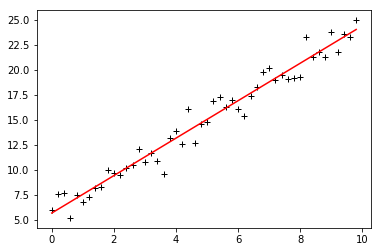

In [17]:
# coding=utf-8
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 构造训练数据
x = np.arange(0., 10., 0.2)
m = len(x)  # 训练数据点数目
x0 = np.full(m, 1.0)
input_data = np.vstack([x0, x]).T  # 将偏置b作为权向量的第一个分量
target_data = 2 * x + 5 + np.random.randn(m)

# 两种终止条件
loop_max = 10000  # 最大迭代次数(防止死循环)
epsilon = 1e-5

# 初始化权值
np.random.seed(0)
w = np.random.randn(2)
# w = np.zeros(2)

alpha = 0.001  # 步长(注意取值过大会导致振荡,过小收敛速度变慢)
diff = 0.
error = np.zeros(2)
count = 0  # 循环次数
finish = 0  # 终止标志
error_list = []
batch_size = 10
n_samples = input_data.shape[0]  # rows -> cases, cols -> features

# -----------------------------------------------批量梯度下降法-----------------------------------------------------------
while count < loop_max:
    count += 1
    
#     permutation = np.random.permutation(input_data.shape[0])
#     input_data = input_data[permutation, :]
#     target_data = target_data[permutation] # x already in order, cannot be shuffled
    
        
    # 标准梯度下降是在权值更新前对所有样例汇总误差，而随机梯度下降的权值是通过考查某个训练样例来更新的
    # 在标准梯度下降中，权值更新的每一步对多个样例求和，需要更多的计算
   
    for i in xrange(0, n_samples, batch_size):
        sum_m = np.zeros(2)
        for j in xrange(batch_size):
            dif = (np.dot(w, input_data[i + j]) - target_data[i + j]) * input_data[i + j]
            
            sum_m = sum_m + dif  # 当alpha取值过大时,sum_m会在迭代过程中会溢出?????????
        w = w - alpha * sum_m * 1./ batch_size  # 注意步长alpha的取值,过大会导致振荡
        error_list.append(np.sum(sum_m)**2)
        # 判断是否已收敛

    if np.linalg.norm(w - error) < epsilon:
        print('w =', w)
        print('e =', error)
        finish = 1
        break
    else:
        error = w
print 'loop count = %d' % count, '\tw:[%f, %f]' % (w[0], w[1])

# ----------------------------------------------------------------------------------------------------------------------


# check with scipy linear regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, target_data)
print 'intercept = %s slope = %s' % (intercept, slope)

plt.plot(range(len(error_list[0:100])), error_list[0:100])
plt.show()

plt.plot(x, target_data, 'k+')
plt.plot(x, w[1] * x + w[0], 'r')
plt.show()